In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
! pip install git+https://github.com/oanda/oandapy.git

  Cloning https://github.com/oanda/oandapy.git to /tmp/pip-req-build-n4e5mzjr
  Running command git clone -q https://github.com/oanda/oandapy.git /tmp/pip-req-build-n4e5mzjr
  Created wheel for oandapy: filename=oandapy-0.1-cp36-none-any.whl size=6851 sha256=6928f1595b0b671dfe40cb2907d868b8b4c960542de4474bc07e43b27ae71ea8
  Stored in directory: /tmp/pip-ephem-wheel-cache-1etwr3ke/wheels/84/33/ea/2d5dddc641a73a23c531dd327e6e743ccbad487a2ae6f38c30
Successfully built oandapy


In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import oandapy
import configparser
import datetime
from datetime import datetime, timedelta
import pytz

In [0]:
import sys
import os

In [0]:
sys.path.append("My Drive")
!cd

In [0]:
config = configparser.ConfigParser()
config.read("/content/drive/My Drive/config_v1.txt") # パスの指定が必要です
account_id = config['oanda']['account_id']
api_key = config['oanda']['api_key']

In [0]:
oanda = oandapy.API(environment="practice", access_token=api_key)

In [0]:
response = oanda.get_history(instrument="USD_JPY", granularity="D",count=5000)

In [0]:
res=pd.DataFrame(response["candles"])
res.head()

,time,openBid,openAsk,highBid,highAsk,lowBid,lowAsk,closeBid,closeAsk,volume,complete
0,2003-09-15T21:00:00.000000Z,116.17,116.20,116.17,116.20,116.17,116.20,116.17,116.20,1,True
1,2003-09-16T21:00:00.000000Z,116.01,116.04,116.01,116.04,116.01,116.04,116.01,116.04,1,True
2,2003-09-17T21:00:00.000000Z,115.23,115.26,115.23,115.26,115.23,115.26,115.23,115.26,1,True
3,2003-09-18T21:00:00.000000Z,113.89,113.99,113.89,113.99,113.89,113.99,113.89,113.99,1,True
4,2003-09-20T21:00:00.000000Z,112.57,112.67,112.57,112.67,112.57,112.67,112.57,112.67,1,True


In [0]:
def iso_jp(iso):
    date = None
    try:
        date = datetime.strptime(iso, '%Y-%m-%dT%H:%M:%S.%fZ')
        date = pytz.utc.localize(date).astimezone(pytz.timezone("Asia/Tokyo"))
    except ValueError:
        try:
            date = datetime.strptime(iso, '%Y-%m-%dT%H:%M:%S.%f%z')
            date = dt.astimezone(pytz.timezone("Asia/Tokyo"))
        except ValueError:
            pass
    return date
 
# datetime -> 表示用文字列
def date_string(date):
    if date is None:
        return ''
    return date.strftime('%Y/%m/%d %H:%M:%S')

In [0]:
res['time'] = res['time'].apply(lambda x: iso_jp(x))
res['time'] = res['time'].apply(lambda x: date_string(x))

In [0]:
res.head()

,time,openBid,openAsk,highBid,highAsk,lowBid,lowAsk,closeBid,closeAsk,volume,complete
0,2003/09/16 06:00:00,116.17,116.20,116.17,116.20,116.17,116.20,116.17,116.20,1,True
1,2003/09/17 06:00:00,116.01,116.04,116.01,116.04,116.01,116.04,116.01,116.04,1,True
2,2003/09/18 06:00:00,115.23,115.26,115.23,115.26,115.23,115.26,115.23,115.26,1,True
3,2003/09/19 06:00:00,113.89,113.99,113.89,113.99,113.89,113.99,113.89,113.99,1,True
4,2003/09/21 06:00:00,112.57,112.67,112.57,112.67,112.57,112.67,112.57,112.67,1,True


In [0]:
df = res[['time', 'openAsk', 'closeAsk', 'highAsk', 'lowAsk', 'volume']]
df.columns = ['time', 'open', 'close', 'high', 'low', 'volume']

In [0]:
df.head()
df[3999:4100]

,time,open,close,high,low,volume
3999,2016/04/19 06:00:00,108.854,109.230,109.496,108.782,27447
4000,2016/04/20 06:00:00,109.238,109.856,109.888,108.772,26864
4001,2016/04/21 06:00:00,109.859,109.474,109.906,109.333,33129
4002,2016/04/22 06:00:00,109.476,111.801,111.834,109.269,44274
4003,2016/04/25 06:00:00,111.892,111.210,111.938,110.849,36083
...,...,...,...,...,...,...
4095,2016/08/31 06:00:00,103.024,103.434,103.540,102.869,27340
4096,2016/09/01 06:00:00,103.462,103.246,104.006,103.072,30765
4097,2016/09/02 06:00:00,103.293,103.992,104.330,102.815,47690
4098,2016/09/05 06:00:00,104.144,103.461,104.186,103.156,29887


In [0]:
#evaluation用のデータないとモデル調整できひｎ
split_date="2016/04/12 06:00:00"
train,test=df[df["time"]<split_date], df[df["time"]>=split_date]
del train["time"]
del test["time"]
train.shape,test.shape,len(train),len(test)

#データ追加したように。。。
mean=train.mean(axis=0)
std=train.std(axis=0)
train-=mean
train/=std
test-=mean
test/=std 

((3994, 5), (1006, 5), 3994, 1006)

def seikika(x):
   ...:     mean=x.mean(axis=0)
   ...:     std=x.std(axis=0)
   ...:     x-=mean
   ...:     x/=std
   ...:     return x
これで正規化して読ませてみる？

In [0]:
window_len=10
train_lstm_in = []
for i in range(len(train) - window_len):
    temp = train[i:(i + window_len)].copy()
    for col in train:
        temp.loc[:, col] = temp[col] / temp[col].iloc[0] - 1
    train_lstm_in.append(temp)
lstm_train_out = (train['close'][window_len:].values / train['close'][:-window_len].values)-1
 
# LSTMへの入力用に処理（テスト）
test_lstm_in = []
for i in range(len(test) - window_len):
    temp = test[i:(i + window_len)].copy()
    for col in test:
        temp.loc[:, col] = temp[col] / temp[col].iloc[0] - 1
    test_lstm_in.append(temp)
lstm_test_out = (test['close'][window_len:].values / test['close'][:-window_len].values)-1

train_lstm_in = [np.array(train_lstm_input) for train_lstm_input in train_lstm_in]
train_lstm_in = np.array(train_lstm_in)
 
test_lstm_in = [np.array(test_lstm_input) for test_lstm_input in test_lstm_in]
test_lstm_in = np.array(test_lstm_in)

In [0]:
from keras.models import Sequential
from keras.layers import Activation, Dense,Bidirectional
from keras.layers import LSTM
from keras.layers import Dropout
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

In [0]:
# LSTMのモデルを設定
np.random.seed(202)

def build_model(inputs, output_size, activ_func="linear",
                dropout=0.25, loss="mae", optimizer="adam"):
    model = Sequential()
 #なんとなく双方向、あとリカレントDropout
    model.add(Bidirectional(LSTM(248, dropout=0.3,recurrent_dropout=0.3,input_shape=(inputs.shape[1], inputs.shape[2]))))
    model.add(Dense(64,activation="relu"))
    model.add(Dropout(dropout))
    model.add(Dense(32,activation="relu"))
    model.add(Dense(1))
 
    model.compile(loss=loss, optimizer=optimizer)
    return model

In [0]:
# 初期モデルの構築
yen_model = build_model(train_lstm_in, output_size=1)
 
# データを流してフィッティングさせましょう
yen_history = yen_model.fit(train_lstm_in, lstm_train_out, 
                            epochs=64, batch_size=1, verbose=1, shuffle=True)

Epoch 1/64
3984/3984 [==============================] - 162s 41ms/step - loss: 0.5404
Epoch 2/64
3984/3984 [==============================] - 160s 40ms/step - loss: 0.5011
Epoch 3/64
3984/3984 [==============================] - 160s 40ms/step - loss: 0.4910
Epoch 4/64
3984/3984 [==============================] - 158s 40ms/step - loss: 0.4668
Epoch 5/64
3984/3984 [==============================] - 159s 40ms/step - loss: 0.4680
Epoch 6/64
3984/3984 [==============================] - 161s 40ms/step - loss: 0.4644
Epoch 7/64
3984/3984 [==============================] - 160s 40ms/step - loss: 0.4502
Epoch 8/64
3984/3984 [==============================] - 164s 41ms/step - loss: 0.4445
Epoch 9/64
3984/3984 [==============================] - 163s 41ms/step - loss: 0.4528
Epoch 10/64
3984/3984 [==============================] - 164s 41ms/step - loss: 0.4350
Epoch 11/64
3984/3984 [==============================] - 161s 40ms/step - loss: 0.4111
Epoch 12/64
3984/3984 [=============================

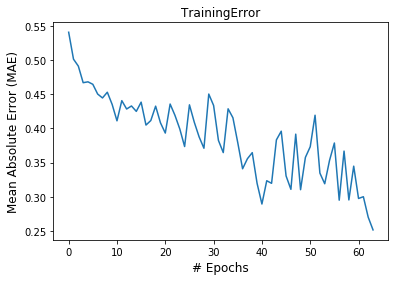

In [0]:
% matplotlib inline
fig, ax1 = plt.subplots(1,1)
 
ax1.plot(yen_history.epoch, yen_history.history['loss'])
ax1.set_title('TrainingError')
 
if yen_model.loss == 'mae':
    ax1.set_ylabel('Mean Absolute Error (MAE)',fontsize=12)
else:
    ax1.set_ylabel('Model Loss',fontsize=12)
ax1.set_xlabel('# Epochs',fontsize=12)
plt.show()

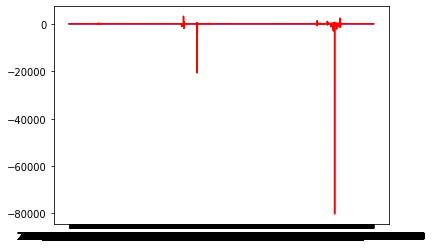

In [0]:
fig, ax1 = plt.subplots(1,1)
ax1.plot(df[df['time']< split_date]['time'][window_len:],
         train['close'][window_len:], label='Actual', color='blue')
ax1.plot(df[df['time']< split_date]['time'][window_len:],
         ((np.transpose(yen_model.predict(train_lstm_in))+1) * train['close'].values[:-window_len])[0], 
         label='Predicted', color='red')

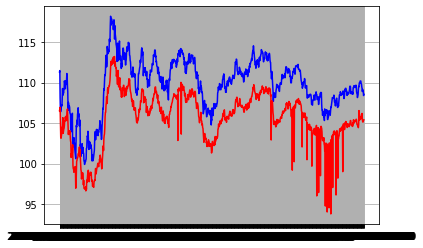

In [0]:
fig, ax1 = plt.subplots(1,1)
ax1.plot(df[df['time']>= split_date]['time'][window_len:],
         test['close'][window_len:], label='Actual', color='blue')
ax1.plot(df[df['time']>= split_date]['time'][window_len:],
         ((np.transpose(yen_model.predict(test_lstm_in))+1) * test['close'].values[:-window_len])[0], 
         label='Predicted', color='red')
ax1.grid(True)

In [0]:
df.head()

,time,open,close,high,low,volume
0,2003/09/09 06:00:00,116.87,116.87,116.87,116.87,1
1,2003/09/10 06:00:00,117.10,117.10,117.10,117.10,1
2,2003/09/11 06:00:00,117.13,117.13,117.13,117.13,1
3,2003/09/12 06:00:00,117.34,117.34,117.34,117.34,1
4,2003/09/14 06:00:00,117.33,117.33,117.33,117.33,1
